# Dataset：“cbg_patterns.csv”

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data_df = pd.read_csv('./cbg_patterns.csv', index_col=0)

## Data summary

In [4]:
data_df.head()

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
census_block_group,,,,,,,,,,,,
1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


In [5]:
data_df.dtypes

date_range_start              int64
date_range_end                int64
raw_visit_count             float64
raw_visitor_count           float64
visitor_home_cbgs            object
visitor_work_cbgs            object
distance_from_home          float64
related_same_day_brand       object
related_same_month_brand     object
top_brands                   object
popularity_by_hour           object
popularity_by_day            object
dtype: object

In [6]:
data_df.shape#数据的大小

(220735, 12)

## missing value：

In [9]:
print("cbg_patterns缺失值数量：\n",data_df.isnull().sum())#数据集各列（属性）缺失值数量统计

cbg_patterns缺失值数量：
 date_range_start              0
date_range_end                0
raw_visit_count             106
raw_visitor_count           106
visitor_home_cbgs             0
visitor_work_cbgs             0
distance_from_home          217
related_same_day_brand        0
related_same_month_brand      0
top_brands                    0
popularity_by_hour            0
popularity_by_day             0
dtype: int64


In [7]:
data_df['related_same_day_brand'].value_counts()

[]                                                                                                                                                                       35542
["Dunkin' Donuts"]                                                                                                                                                        7010
["starbucks"]                                                                                                                                                             4178
["walmart"]                                                                                                                                                               3054
["mcdonalds"]                                                                                                                                                             2911
["Wawa"]                                                                                                                     

In [11]:
data_df['related_same_month_brand'].value_counts()

[]                                                                                                                                                                              2983
["SmartStyle Family Hair Salons"]                                                                                                                                                335
["Department of Veterans Affairs"]                                                                                                                                               156
["H&R Block"]                                                                                                                                                                    134
["Sprint"]                                                                                                                                                                       112
["MasterCuts"]                                                                                 

In [12]:
data_df['top_brands'].value_counts()

[]                                                                                                                                                                                                                                      74540
["United States Postal Service (USPS)"]                                                                                                                                                                                                  5352
["Aflac (American Family Life Assurance)"]                                                                                                                                                                                               1517
["Dollar General"]                                                                                                                                                                                                                       1308
["National Association for the Education of Youn

In [19]:
data_df[['raw_visit_count','raw_visitor_count','distance_from_home']].describe()##数值属性的5数概括

,raw_visit_count,raw_visitor_count,distance_from_home
count,2.206290e+05,2.206290e+05,2.205180e+05
mean,4.793066e+04,1.182032e+04,3.511280e+04
std,6.252655e+04,3.045832e+04,9.973193e+04
min,6.000000e+01,5.000000e+01,7.060000e+02
25%,1.704200e+04,3.430000e+03,8.584000e+03
50%,3.064000e+04,6.541000e+03,1.461400e+04
75%,5.667800e+04,1.309900e+04,3.139775e+04
max,7.179900e+06,6.113949e+06,6.297845e+06


## Histogram：

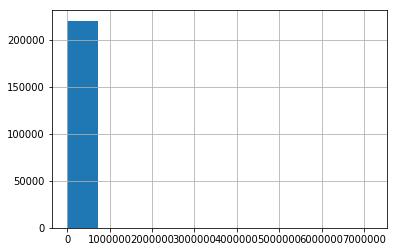

In [16]:
data_df['raw_visit_count'].hist()

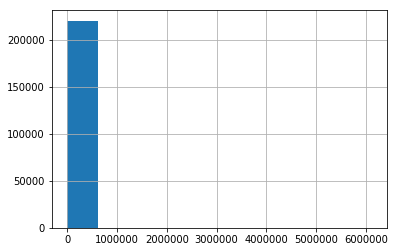

In [17]:
data_df['raw_visitor_count'].hist()

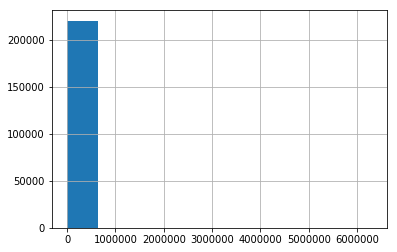

In [18]:
data_df['distance_from_home'].hist()

In [20]:
def plot_feature_distribution(df, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,5,figsize=(18,6))

    for feature in features:
        i += 1
        plt.subplot(1,5,i)
        sns.kdeplot(df[feature], bw=0.5,label=feature)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 432x288 with 0 Axes>

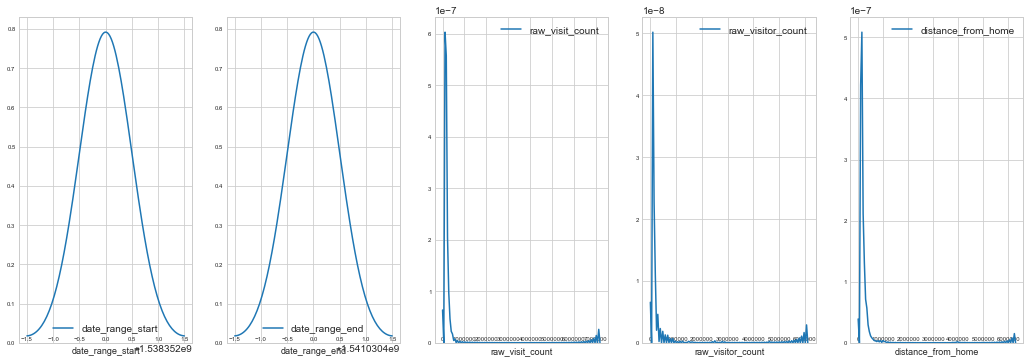

In [23]:
features = ['date_range_start','date_range_end','raw_visit_count','raw_visitor_count','distance_from_home']
plot_feature_distribution(data_df, features)

## Box figure

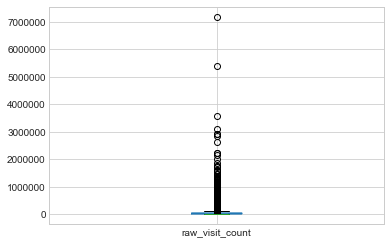

In [31]:
data_df['raw_visit_count'].plot(kind='box', notch=True, grid=True)
plt.show()

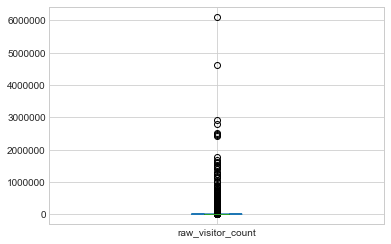

In [32]:
data_df['raw_visitor_count'].plot(kind='box', notch=True, grid=True)
plt.show()

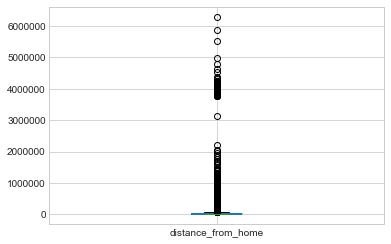

In [33]:
data_df['distance_from_home'].plot(kind='box', notch=True, grid=True)
plt.show()

## 数据缺失处理

In [34]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [35]:
%%time
missing_data(data_df)

Wall time: 634 ms


,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
Total,0,0,106,106,0,0,217,0,0,0,0,0
Percent,0,0,0.0480214,0.0480214,0,0,0.0983079,0,0,0,0,0
Types,int64,int64,float64,float64,object,object,float64,object,object,object,object,object


## Directly culled missing values：

In [28]:
del_df = data_df.dropna()

In [29]:
del_df.shape

(220518, 12)

In [30]:
print("cbg_patterns缺失值数量：\n",del_df.isnull().sum())#数据集各列（属性）缺失值数量统计

cbg_patterns缺失值数量：
 date_range_start            0
date_range_end              0
raw_visit_count             0
raw_visitor_count           0
visitor_home_cbgs           0
visitor_work_cbgs           0
distance_from_home          0
related_same_day_brand      0
related_same_month_brand    0
top_brands                  0
popularity_by_hour          0
popularity_by_day           0
dtype: int64


In [38]:
del_df.head()

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
census_block_group,,,,,,,,,,,,
1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


## Fill high frequency value ：

In [32]:
from collections import Counter
from math import isnan

miss_features = ['raw_visit_count','raw_visitor_count','distance_from_home']
fill_df = data_df

for col in miss_features:
    word_counts = Counter(fill_df[col])
    top = word_counts.most_common(1)[0][0]
    if type(top) != str:
        if isnan(top):
            top = word_counts.most_common(2)[1][0]
    print(top, type(top))
    temp = fill_df[col].fillna(top)
    fill_df[col] = temp
fill_df.head()

24531.0 <class 'float'>
2292.0 <class 'float'>
8345.0 <class 'float'>


,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
census_block_group,,,,,,,,,,,,
1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


In [33]:
print("cbg_patterns缺失值数量：\n",fill_df.isnull().sum())#数据集各列（属性）缺失值数量统计

cbg_patterns缺失值数量：
 date_range_start            0
date_range_end              0
raw_visit_count             0
raw_visitor_count           0
visitor_home_cbgs           0
visitor_work_cbgs           0
distance_from_home          0
related_same_day_brand      0
related_same_month_brand    0
top_brands                  0
popularity_by_hour          0
popularity_by_day           0
dtype: int64


In [41]:
missing_data(fill_df)

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
Total,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,float64,float64,object,object,float64,object,object,object,object,object


## Similarity padding between objects：

In [43]:
data_df.corr()

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
date_range_start,NaN,NaN,NaN,NaN,NaN
date_range_end,NaN,NaN,NaN,NaN,NaN
raw_visit_count,NaN,NaN,1.000000,0.815860,0.021867
raw_visitor_count,NaN,NaN,0.815860,1.000000,0.032968
distance_from_home,NaN,NaN,0.021867,0.032968,1.000000


In [44]:
data_df.corr('spearman')

,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,distance_from_home
date_range_start,NaN,NaN,NaN,NaN,NaN
date_range_end,NaN,NaN,NaN,NaN,NaN
raw_visit_count,NaN,NaN,1.000000,0.937175,0.182710
raw_visitor_count,NaN,NaN,0.937175,1.000000,0.199526
distance_from_home,NaN,NaN,0.182710,0.199526,1.000000


## The correlation padding between the properties：

In [ ]:
from fancyimpute import KNN
fill_knn = KNN(k=3).fit_transform(dfc)
dfc_fill_knn = pd.DataFrame(fill_knn)